In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
df = load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
df =df[df['species']!="versicolor"]

In [11]:
LB = LabelEncoder()

In [12]:
df['species'] = LB.fit_transform(df['species'])

In [13]:
LR = LinearRegression()

In [14]:
x = df.iloc[:,0].values.reshape(-1,1)
y= df.iloc[:,4].values.reshape(-1,1)

In [15]:
LR.fit(x,y)

LinearRegression()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [17]:
LR.fit(x_train,y_train)

LinearRegression()

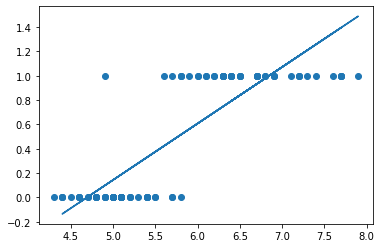

In [19]:
plt.scatter(x,y)
plt.plot(x_test,LR.predict(x_test))

In [20]:
LogR = LogisticRegression()

In [21]:
LogR.fit(x_test,y_test)

C:\Users\User27\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

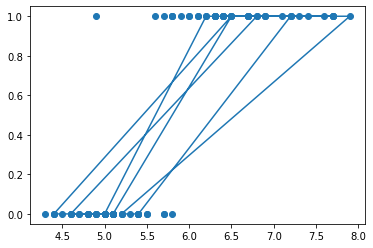

In [22]:
plt.scatter(x,y)
plt.plot(x_test,LogR.predict(x_test))

C:\Users\User27\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

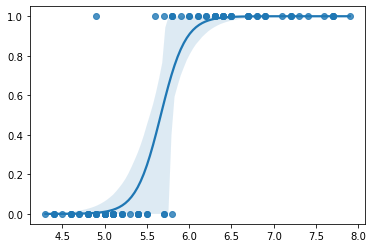

In [24]:
sns.regplot(x,y,logistic = True)

In [26]:
confusion_matrix(y_test,LogR.predict(x_test))

array([[ 8,  0],
       [ 0, 12]], dtype=int64)

In [27]:
accuracy_score(y_test,LogR.predict(x_test))

1.0